# Airbnb NYC Price Prediction
Author: Nathaniel Joseph
Project Question: Can we accurately predict the nightly price of Airbnb listings in New York City using features such as neighborhood, room type, availability, and reviews?

# 1. Introduction

This notebook explores the Airbnb NYC dataset to predict nightly listing prices using machine learning. 
We will explore the data, create visualizations, preprocess it, train two models (Linear Regression and Random Forest), and analyze results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Studio Oasis | Midtown Manhattan Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,47,2022-06-21,0.24,3,289,0,NaN
1,6848,Only 2 stops to Manhattan studio,15991,Allen,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,96.0,30,195,2025-06-09,0.98,1,285,3,NaN
2,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,East Harlem,40.80107,-73.94255,Private room,59.0,30,1,2022-06-05,0.02,2,83,0,NaN
3,6990,UES Beautiful Blue Room,16800,Cynthia,Manhattan,East Harlem,40.78778,-73.94759,Private room,73.0,30,249,2025-05-27,1.28,1,186,4,NaN
4,7064,"Amazing location! Wburg. Large, bright & tranquil",17297,Joelle,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,NaN,30,13,2022-09-12,0.07,2,0,0,NaN


The dataset contains over 40,000 listings in New York City with features including neighborhood, room type, price, reviews, and availability.

In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36111 entries, 0 to 36110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36111 non-null  int64  
 1   name                            36109 non-null  object 
 2   host_id                         36111 non-null  int64  
 3   host_name                       34945 non-null  object 
 4   neighbourhood_group             36111 non-null  object 
 5   neighbourhood                   36111 non-null  object 
 6   latitude                        36111 non-null  float64
 7   longitude                       36111 non-null  float64
 8   room_type                       36111 non-null  object 
 9   price                           21328 non-null  float64
 10  minimum_nights                  36111 non-null  int64  
 11  number_of_reviews               36111 non-null  int64  
 12  last_review                     

id                                    0
name                                  2
host_id                               0
host_name                          1166
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             14783
minimum_nights                        0
number_of_reviews                     0
last_review                       11188
reviews_per_month                 11188
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           30735
dtype: int64

There are some missing values in `reviews_per_month`. Prices vary widely, with some extreme outliers over $1000.

In [8]:
import os

os.makedirs("results/figures", exist_ok=True)

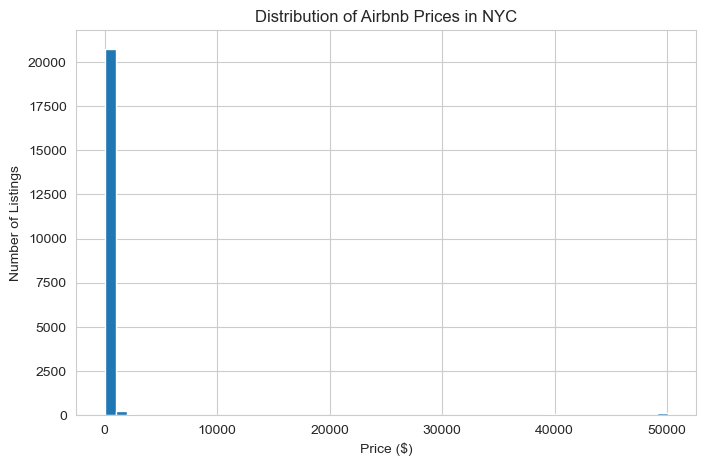

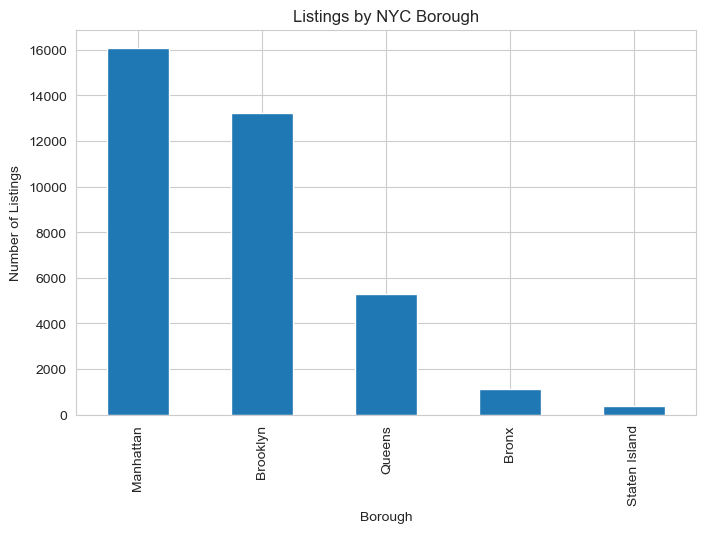

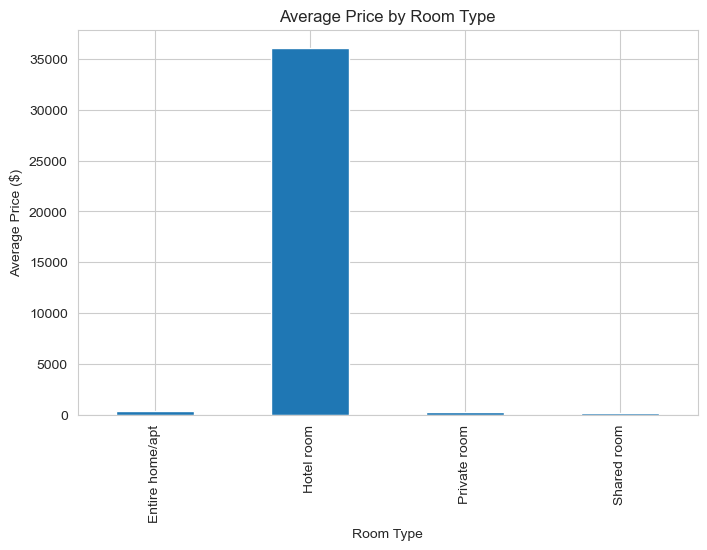

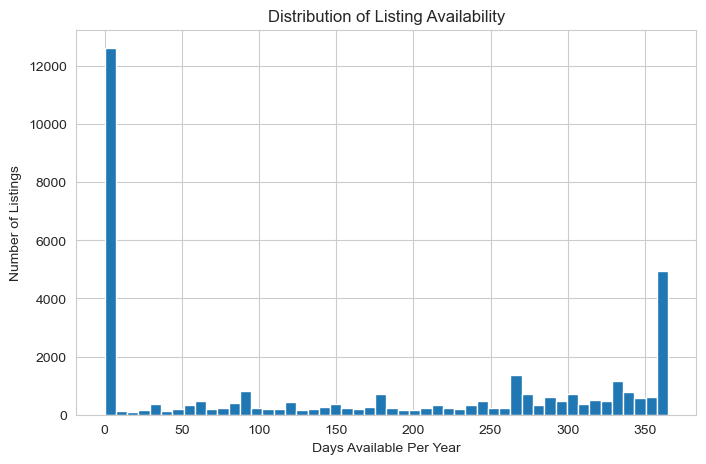

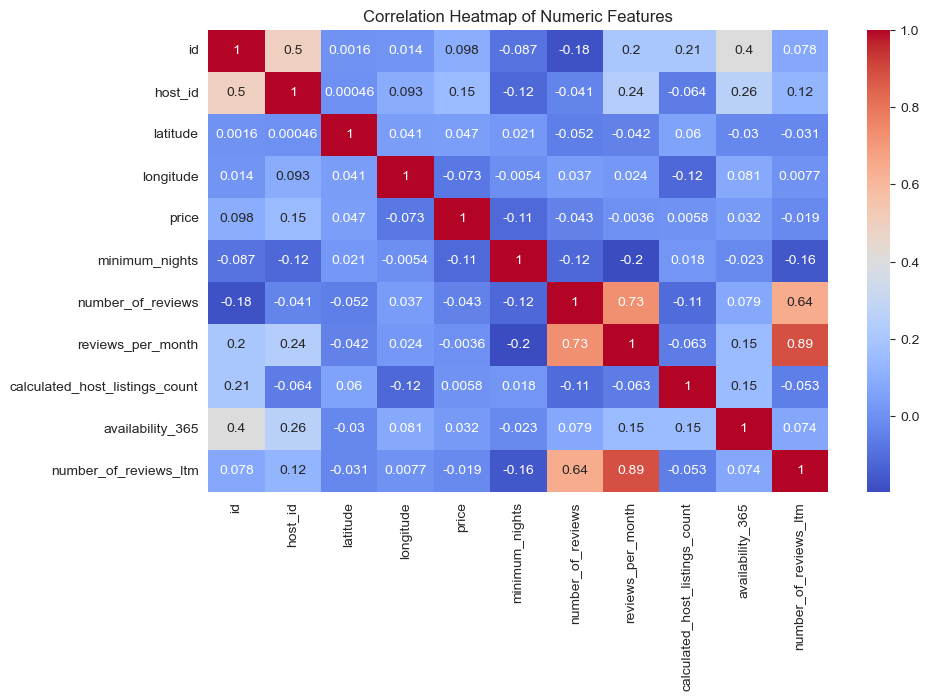

<Figure size 800x500 with 0 Axes>

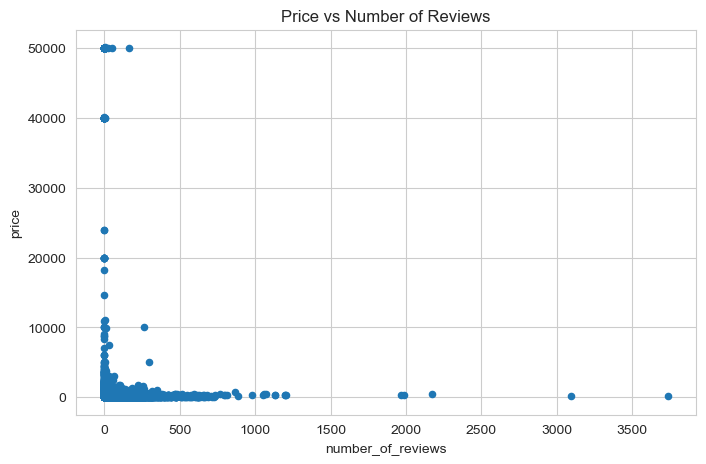

In [10]:
# 5. Visual Analysis

# 5.1 Price Distribution
plt.figure(figsize=(8,5))
df['price'].hist(bins=50)
plt.title("Distribution of Airbnb Prices in NYC")
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.savefig("results/figures/price_distribution.png")
plt.show()

# 5.2 Listings by Borough
plt.figure(figsize=(8,5))
df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.title("Listings by NYC Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Listings")
plt.savefig("results/figures/listings_by_borough.png")
plt.show()

# 5.3 Average Price by Room Type
plt.figure(figsize=(8,5))
df.groupby('room_type')['price'].mean().plot(kind='bar')
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price ($)")
plt.savefig("results/figures/avg_price_by_room_type.png")
plt.show()

# 5.4 Availability Distribution
plt.figure(figsize=(8,5))
df['availability_365'].hist(bins=50)
plt.title("Distribution of Listing Availability")
plt.xlabel("Days Available Per Year")
plt.ylabel("Number of Listings")
plt.savefig("results/figures/availability_distribution.png")
plt.show()

# 5.5 Correlation Heatmap
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=np.number) 
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.savefig("results/figures/correlation_heatmap.png")
plt.show()


# 5.6 Price vs Number of Reviews
plt.figure(figsize=(8,5))
df.plot(kind='scatter', x='number_of_reviews', y='price', figsize=(8,5))
plt.title("Price vs Number of Reviews")
plt.savefig("results/figures/price_vs_reviews.png")
plt.show()

In [19]:

print(df.columns)


drop_cols = ['name', 'host_name', 'last_review', 'id', 'host_id', 'license']
for col in drop_cols:
    if col in df.columns:
        df = df.drop(columns=[col])


categorical_cols = []
for col in ['neighbourhood_group', 'neighbourhood', 'room_type']:
    if col in df.columns:
        categorical_cols.append(col)


df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


df = df[df['price'] <= 500]


df = df.dropna()


X = df.drop('price', axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.dtypes.value_counts())

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license',
       ...
       'neighbourhood_Whitestone', 'neighbourhood_Williamsbridge',
       'neighbourhood_Williamsburg', 'neighbourhood_Windsor Terrace',
       'neighbourhood_Woodhaven', 'neighbourhood_Woodlawn',
       'neighbourhood_Woodside', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object', length=198)
bool       188
int64        5
float64      3
Name: count, dtype: int64


In [20]:
# 7. Machine Learning Models

# 7.1 Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("Linear Regression MAE:", mean_absolute_error(y_test, lr_preds))
print("Linear Regression MSE:", mean_squared_error(y_test, lr_preds))
print("Linear Regression R2:", r2_score(y_test, lr_preds))

# 7.2 Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest MAE:", mean_absolute_error(y_test, rf_preds))
print("Random Forest MSE:", mean_squared_error(y_test, rf_preds))
print("Random Forest R2:", r2_score(y_test, rf_preds))

Linear Regression MAE: 64.71248431803765
Linear Regression MSE: 6868.798264295739
Linear Regression R2: 0.41609533056197034
Random Forest MAE: 48.35165424739195
Random Forest MSE: 4345.744750819672
Random Forest R2: 0.6305757492719748


Linear Regression provides a simple baseline but struggles with non-linear patterns. Random Forest performs better due to its ability to capture complex relationships. Room type and neighborhood group are the most important features for price prediction.

# Results Analysis

Random Forest gave the best predictions. Linear Regression struggled with outliers and non-linear relationships. Removing extreme prices improved both models. Room type, neighborhood, and availability are the most important features for predicting price.

# Conclusion

This project shows that machine learning can be used to predict Airbnb prices in NYC. Random Forest Regressor performed the best. Challenges included handling outliers and converting categorical features to numeric form. I learned how to explore data, preprocess it, build models, and evaluate results. Complex models perform better on real-world datasets like this one.

# References

- New York City Airbnb Open Data. Kaggle, www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data.
- Pedregosa, Fabian, et al. Scikit-Learn: Machine Learning in Python. Journal of Machine Learning Research, vol. 12, 2011, pp. 2825–2830.
- Scikit-Learn Documentation: Random Forests and Linear Regression.